In [187]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [188]:
#WORKSPACE_PATH = "/content/gdrive/Shareddrives/ING3 (2022-23) Mlamali/22 • Big Data/Project Evaluation ML/Diabetes Prediction App"
WORKSPACE_PATH = ""

DATADIR_PATH = f"{WORKSPACE_PATH}/data"

# Diabetes Prediction

> Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

todo : fuse with... : Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

Can you build a machine learning model to accurately **predict whether or not the patients in the dataset have diabetes or not?**

## Objective

We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

## Import librairies

In [189]:
try:
    import lazypredict
except:
    !pip install lazypredict

In [190]:
import pandas as pd
import numpy as np

import seaborn as sns  # library for visualization
import matplotlib.pyplot as plt  # library for visualization
% matplotlib inline

UsageError: Line magic function `%` not found.


In [ ]:
import warnings
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

warnings.filterwarnings("ignore")

import plotly

plotly.__version__

In [ ]:
#importing essential libraries
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, accuracy_score, recall_score, \
    precision_score, mean_squared_error, r2_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [365]:
import tensorflow as tf

ModuleNotFoundError: No module named 'google.protobuf'

## The Dataset 📁

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The dataset consists of several medical predictor variables and one target variable, Outcome. Predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Details about the dataset**:
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

- `Pregnancies`: Number of times pregnant

- `Glucose`: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- `BloodPressure`: Diastolic blood pressure (mm Hg)
- `SkinThickness`: Triceps skin fold thickness (mm)
- `Insulin`: 2-Hour serum insulin (mu U/ml)
- `BMI`: Body mass index (weight in kg/(height in m)^2)
- `DiabetesPedigreeFunction`: Diabetes pedigree function
- `Age`: Age (years)
- Outcome: Class variable (0 or 1)
Number of Observation Units: 768

### Read
load diabetes.csv

In [ ]:
df_diabetes = pd.read_csv(f"data/diabetes.csv")
df_diabetes.head()

### Infos

In [ ]:
df_diabetes.shape

In [ ]:
df_diabetes.columns

Les colonnes incluses dans ce jeu de données sont les suivantes :

1. Pregnancies : Nombre de grossesses
2. Glucose : Taux de glucose plasmatique à 2 heures dans un test de tolerance au glucose
3. BloodPressure : Pression sanguine (mm Hg)
4. SkinThickness : Épaisseur cutanée (mm)
5. Insulin : Taux sérique d'insuline (mu U/ml)
6. BMI : Indice de masse corporelle (poids en kg / (taille en m)^2)
7. DiabetesPedigreeFunction : Fonction de pedigree de diabète
8. Age : Âge (années)
9. Outcome : Résultat du test de diabète (0 = pas de diabète, 1 = diabète)

In [ ]:
df_diabetes.info()

In [ ]:
df_diabetes.describe()

On remarque des valeurs nulle (=0), c'est illogique.

### Removing the Duplicates

In [ ]:
df_diabetes.duplicated().sum()

### Missing Values

Now let us check for missing values.

In [ ]:
df_diabetes.isnull().any()

However the dataset shows some of the features having minimum value as 0 like insulin,BMI,glucose which is not logical and can be considered missing values

In [ ]:
df_diabetes.loc[df_diabetes["Glucose"] == 0, "Glucose"]

In [ ]:
columns_without_target_col = df_diabetes.columns[:-1]
columns_with_missing_vals = []
total_ms_vals = 0
for column in columns_without_target_col:
    ms_vals = len(df_diabetes.loc[df_diabetes[column] == 0, column])
    total_ms_vals += ms_vals
    print(f"{ms_vals / len(df_diabetes[column]):>5.1%} of Missing values for {column} ({ms_vals} values)")
    if ms_vals > 0:
        columns_with_missing_vals.append(column)

print(f"------\nTotal : {total_ms_vals}/{df_diabetes.size} -> {total_ms_vals / df_diabetes.size:.0%}")


#### Process missings values

we will be imputing these missing values with the mean with help of sklearn imputer

In [ ]:
columns_with_missing_vals

In [ ]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=0, strategy="mean")
df_diabetes_0_meaned = df_diabetes.copy()
df_diabetes_0_meaned.loc[:, columns_with_missing_vals] = impute.fit_transform(
    df_diabetes.loc[:, columns_with_missing_vals])
print(df_diabetes_0_meaned.shape)
df_diabetes_0_meaned.describe()

All the zero values have been imputed



In [ ]:
df_diabetes_0_dropped = df_diabetes[~(df_diabetes[columns_without_target_col] == 0).any(axis=1)]
print(df_diabetes_0_dropped.shape)
df_diabetes_0_dropped.describe()

### Choose a processed dataset

In [ ]:
df_diabetes = df_diabetes_0_meaned
df_diabetes.shape

## EDA  📊

In statistics, exploratory data analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods

### Outcome Distribution
lets see the distribution of Outcome(diabetes or not)

In [ ]:

plt.show()

# The distribution of the outcome variable in the data was examined and visualized.
f, ax = plt.subplots(1, 2, figsize=(13, 6))

sns.countplot(x='Outcome', data=df_diabetes, ax=ax[0])
ax[0].set_title("Count of Outcome (diabetes or not)")

df_diabetes['Outcome'].value_counts().plot.pie(explode=[0, 0.05], autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Distribution of Diabete')
ax[1].set_ylabel('')

plt.show()

The dataset is slightly imbalanced wrt to outcome as 65% of patients have low of diabetes and only 34% patients have high chance.  

**[](go)**

### Correlation 

In [ ]:
plt.figure(figsize=(13, 8))
sns.set_style("darkgrid")
sns.heatmap(df_diabetes.corr(), annot=True)
plt.show()

In [ ]:
# Calculer la matrice de corrélation
correlation_matrix = df_diabetes.corr()
columns_to_drop = []
# Boucle sur les colonnes de la matrice de corrélation
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        # Si la corrélation est supérieure à 0,9
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            columns_to_drop.append(correlation_matrix.columns[j])

columns_to_drop

### Age Distribution

lets see the distribution of age across dataset

In [ ]:
fig = plt.figure(figsize=(12, 15))
# Créer un histogramme de la distribution de l'âge en fonction de la colonne "Outcome" avec Seaborn
#fig.suptitle("Distribution", fontsize=16)
for i, col in enumerate(columns_without_target_col):
    ax = fig.add_subplot(len(columns_without_target_col) // 2, 2, i + 1)
    sns.histplot(data=df_diabetes, x=col, kde=True, hue="Outcome", ax=ax)

plt.subplots_adjust(hspace=0.22, wspace=0.15)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 6))
sns.boxplot(x='Outcome', y='Age', data=df_diabetes)
#ax.set_ylim(0,300)
plt.title("Outcome vs Age")
plt.show()

### Glucode + Age

Glucose and age correlation/ distribution across target variable

In [ ]:
ax = px.scatter(df_diabetes, x="Glucose", y="Age", marginal_x='histogram', marginal_y='histogram', size="Age",
                size_max=8, color="Outcome", title="Age and Glucose correlation")
ax.show()

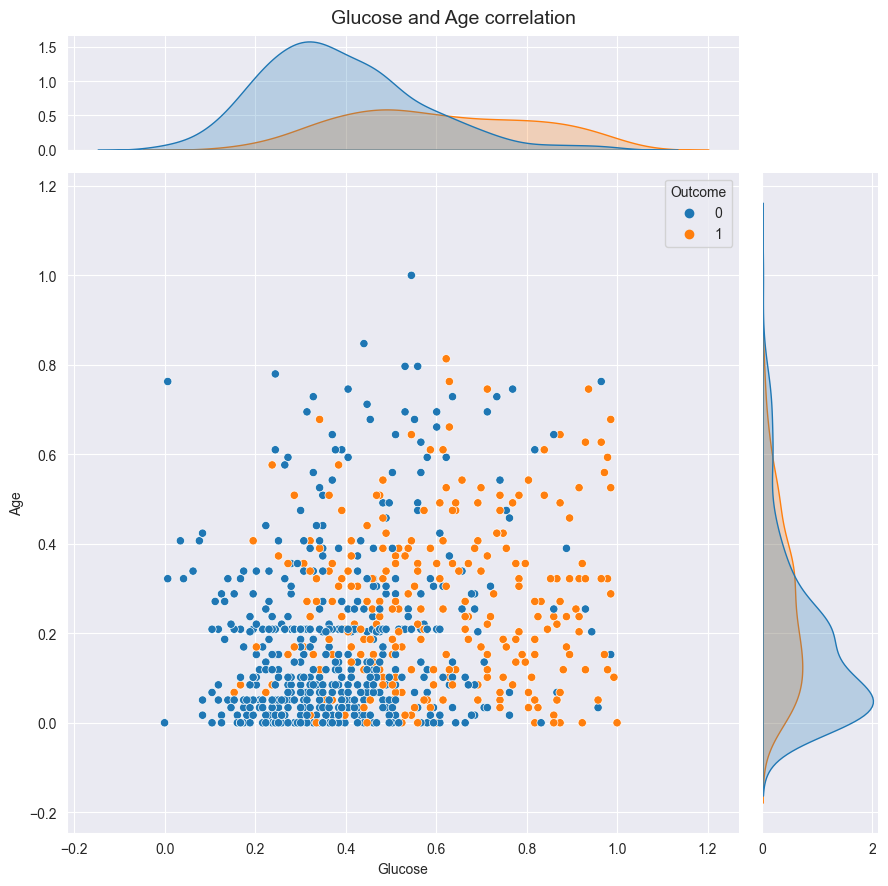

In [241]:
def show_scatter_correlation(df, x, y):
    # Créer un scatter plot avec histogrammes marginaux de la corrélation entre l'âge et le taux de glucose, en colorant les points en fonction de la colonne "Outcome"
    g = sns.jointplot(data=df, x=x, y=y, hue="Outcome", height=9, marginal_ticks=True)
    #g.ax_joint.set_xlim(0)
    #g.ax_joint.set_ylim(0)
    # Ajouter un titre
    plt.subplots_adjust(top=0.95)
    plt.suptitle(f"{x} and {y} correlation", fontsize=14)
    # Afficher le graphique
    plt.show()


show_scatter_correlation(df_diabetes, x="Glucose", y="Age")


Dans le cas de ce graphique, la normalisation peut avoir été réalisée car les données de l'ensemble de données diabetes ont des échelles très différentes. Par exemple, le taux de glucose varie de 0 à 200, tandis que l'âge varie de 20 à 80. Si les données n'ont pas été normalisées, le taux de glucose aurait une influence beaucoup plus importante sur le graphique que l'âge en raison de son échelle plus grande.

### Blood pressure + Age 
blood pressure and age correlation/ distribution across target variable

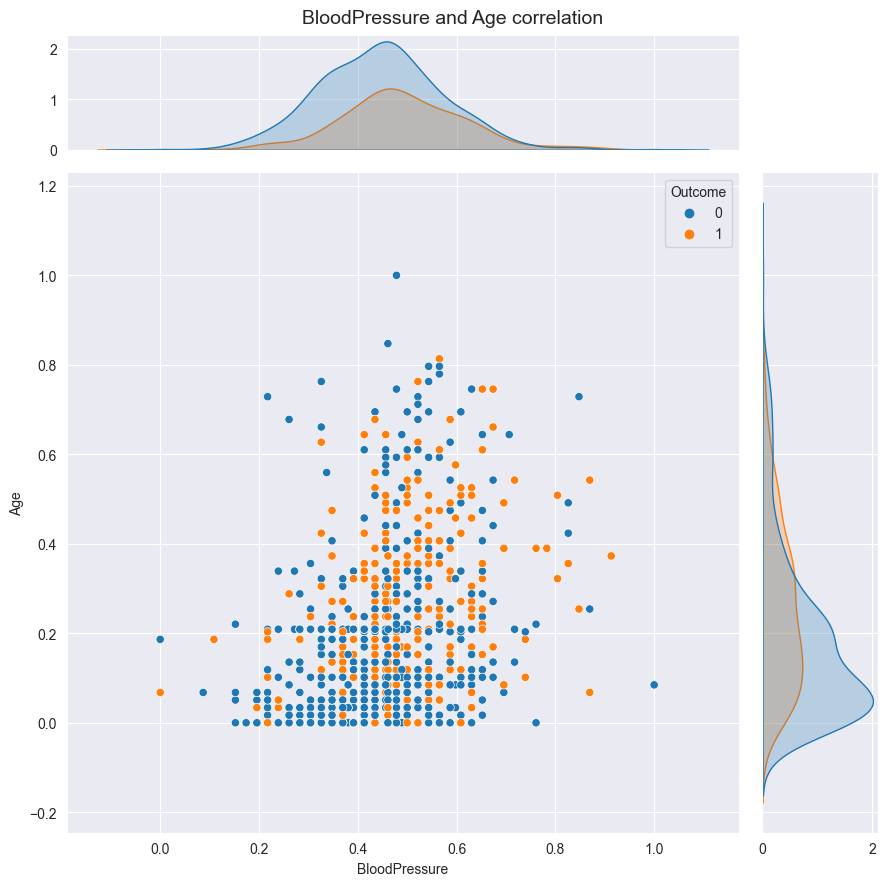

In [242]:
show_scatter_correlation(df_diabetes, x="BloodPressure", y="Age")

### Insuline + Age

Insulin and age correlation/ distribution across target variable

In [ ]:
show_scatter_correlation(df_diabetes, x="Insulin", y="Age")

### Insulin  + Glucose + Age

3D scatterplot showing correlation between insulin and glucose across ages and it impacts the target variable

In [243]:
ax = px.scatter_3d(df_diabetes, x="Age", y="Glucose", z="Insulin", template="plotly_dark", color="Outcome")
ax.show()

In [ ]:
fig = plt.figure(figsize=(11, 8))
angles = [(30, 120), (30, 240), (60, 60), (90, 0)]
colors = {0: 'blue', 1: 'yellow'}
for i, (elev, azim) in enumerate(angles, start=1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    ax.view_init(elev=elev, azim=azim)
    ax.scatter(df_diabetes['Age'], df_diabetes['Glucose'], df_diabetes['Insulin'], c=df_diabetes['Outcome'].map(colors))
    ax.set_xlabel('Age')
    ax.set_ylabel('Glucose')
    ax.set_zlabel('Insulin')
plt.tight_layout()
plt.show()

### BMI + Diabetes pedigree function

Visualizing the BMI and diabetes pedigree function


In [ ]:
fig = px.area(df_diabetes, x="Age", y="BMI", color="Outcome")
fig.show()

In [ ]:
df_diabetes.columns

In [ ]:
ax = px.box(df_diabetes.iloc[:, 1:-1], template="plotly_dark")
ax.show()

In [ ]:
ax = px.parallel_coordinates(df_diabetes.loc[:, ["BMI", 'DiabetesPedigreeFunction', "Outcome"]], color="Outcome")
ax.show()
plt.show()

## Model Building 🔥

In [ ]:
models_metrics_results = []

### Preprocessing

In [244]:
df_diabetes.var()

Pregnancies                0.03
Glucose                    0.04
BloodPressure              0.02
SkinThickness              0.01
Insulin                    0.01
BMI                        0.02
DiabetesPedigreeFunction   0.02
Age                        0.04
Outcome                    0.23
dtype: float64

In [ ]:
df_diabetes.mean()

The features have high variance and hence need to be normalized

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Instancier un objet MinMaxScaler
scaler = MinMaxScaler()
cols_to_normalize = df_diabetes.columns[:-1]
# Normaliser les données en utilisant le fit_transform de MinMaxScaler
df_diabetes[cols_to_normalize] = scaler.fit_transform(df_diabetes[cols_to_normalize])

In [ ]:
df_diabetes.var()

In [ ]:
df_diabetes.mean()

### Split Train/Test set

In [191]:
y = df_diabetes["Outcome"]
X = df_diabetes.drop("Outcome", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

df_diabetes_train = pd.concat([X_train, y_train], axis=1)
df_diabetes_test = pd.concat([X_test, y_test], axis=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(691, 8)
(691,)
(77, 8)
(77,)


### Fix Imbalencement data 🔨

- https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset 
- https://towardsdatascience.com/heres-what-i-ve-learnt-about-sklearn-resample-ab735ae1abc4


In a Machine Learning problem, make sure to upsample/downsample ONLY AFTER you split into train, test (and validate if you wish). If you do upsample your dataset before you split into train and test, there is a high possibility that your model is exposed to data leakage. Doing this might give us a wrong sense of what our Machine Learning model is really performing.

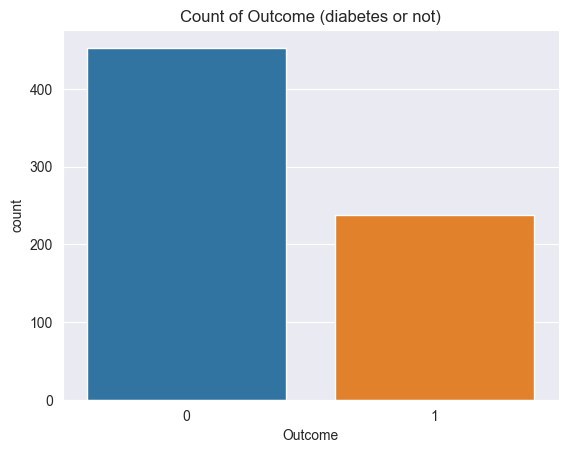

In [192]:
sns.countplot(x='Outcome', data=df_diabetes_train)  #data=df_diabetes_train)
plt.title("Count of Outcome (diabetes or not)")
plt.show()

In [193]:
df_diabetes_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00
mean,0.21,0.46,0.46,0.24,0.17,0.29,0.16,0.21,0.34
std,0.17,0.21,0.13,0.10,0.10,0.14,0.14,0.19,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.13,0.31,0.37,0.20,0.13,0.19,0.07,0.05,0.00
50%,0.20,0.43,0.46,0.23,0.17,0.29,0.12,0.17,0.00
75%,0.27,0.59,0.54,0.27,0.17,0.37,0.23,0.32,1.00
max,1.00,1.00,1.00,1.00,1.00,0.84,1.00,1.00,1.00


In [194]:
def augmente_dataset(df, noise_variance=0.025):
    # Séparer les lignes en deux groupes en fonction de la valeur de la colonne "Outcome"
    df_minority = df[df['Outcome'] == 1]
    df_majority = df[df['Outcome'] == 0]  # d'après le graphique il y a bc plus de 0

    from sklearn.utils import resample
    # Effectuer la data augmentation en dupliquant aléatoirement les lignes du groupe minoritaire jusqu'à ce qu'il ait le même nombre de lignes que le groupe majoritaire
    df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority) - len(df_minority),
                                     random_state=123)

    # Ajouter un peu de bruit aux nouvelles lignes en générant des valeurs aléatoires à partir d'une distribution normal
    noise = np.random.normal(0, noise_variance, (df_minority_upsampled.shape[0], df_minority_upsampled.shape[1] - 1))
    cols = df_minority_upsampled.columns[:-1]
    df_minority_upsampled.loc[:, cols] = np.abs(df_minority_upsampled.loc[:, cols] + noise)
    df_minority_upsampled

    # Concaténer les deux groupes en un seul jeu de données équilibré
    df_augmented = pd.concat([df_majority, df_minority, df_minority_upsampled])
    df_augmented.shape

    # Mélanger les lignes pour éviter tout biais
    df_augmented = df_augmented.sample(frac=1, random_state=123).reset_index(drop=True)

    return df_augmented


print(df_diabetes_train.shape)
df_diabetes_train_augmented = augmente_dataset(df_diabetes_train, noise_variance=0.02)

print(df_diabetes_train_augmented.shape)
df_diabetes_train_augmented.describe()

(691, 9)
(906, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,906.00,906.00,906.00,906.00,906.00,906.00,906.00,906.00,906.00
mean,0.23,0.49,0.47,0.24,0.18,0.31,0.18,0.22,0.50
std,0.17,0.22,0.13,0.10,0.11,0.14,0.15,0.19,0.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.13,0.33,0.39,0.20,0.14,0.21,0.07,0.07,0.00
50%,0.20,0.46,0.46,0.23,0.17,0.30,0.13,0.19,0.50
75%,0.27,0.64,0.54,0.28,0.17,0.38,0.24,0.34,1.00
max,1.03,1.06,1.00,1.00,1.00,0.84,1.02,1.00,1.00


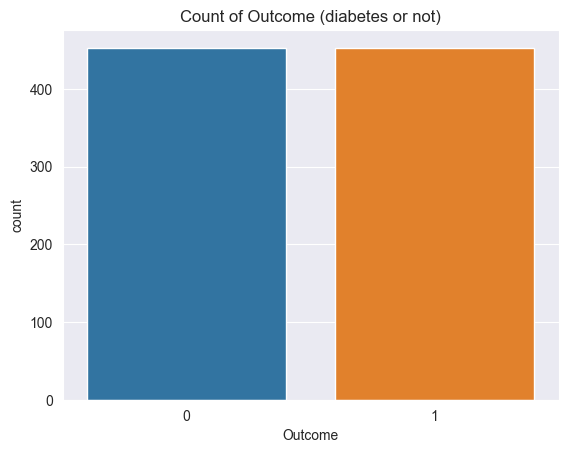

In [195]:
#df_augmented_train.to_csv(f"{WORKSPACE_PATH}/diabetes_augmented_train.csv", index=False)
sns.countplot(x='Outcome', data=df_diabetes_train_augmented)
plt.title("Count of Outcome (diabetes or not)")
plt.show()

In [196]:
y_train_augmented = df_diabetes_train_augmented["Outcome"]
X_train_augmented = df_diabetes_train_augmented.drop("Outcome", axis=1)
X_train_augmented.shape

(906, 8)

### ML Models !

Comment on va évaluer nos modeles 🇰

La validation croisée est souvent considérée comme une méthode plus fiable pour évaluer la performance d'un modèle de machine learning par rapport au simple fractionnement des données en ensembles de formation et de test. Voici quelques raisons pour lesquelles la validation croisée est souvent préférée :

Utilisation efficace des données : La validation croisée utilise toutes les données disponibles pour l'entraînement et la validation, tandis que le fractionnement simple n'utilise qu'une partie des données pour l'entraînement et une autre partie pour la validation. Cela signifie que la validation croisée peut fournir une estimation plus précise de la performance du modèle.

Réduction de la variance : Dans un simple fractionnement, la performance du modèle dépend de la façon dont les données sont divisées. En revanche, la validation croisée utilise plusieurs fractionnements aléatoires différents des données, ce qui permet de réduire la variance des résultats et de fournir une estimation plus stable de la performance.

Gestion des biais : La validation croisée permet de limiter le risque de biais dans l'estimation de la performance du modèle, en fournissant des mesures de performance plus robustes à partir de plusieurs ensembles de données différents.

Adaptabilité : La validation croisée peut être adaptée pour des ensembles de données de différentes tailles et des problèmes de classification ou de régression, en utilisant différentes méthodes telles que la validation croisée k-fold, la validation croisée leave-one-out, la validation croisée stratifiée, etc.

En somme, la validation croisée est considérée comme une méthode plus fiable pour évaluer la performance d'un modèle de machine learning car elle utilise efficacement toutes les données disponibles, réduit la variance et gère les biais, tout en étant adaptable à différents ensembles de données et problèmes de machine learning.

On va se concentrer sur le recall

#### 🤖🤖🤖 Lazy...

In [197]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:01<00:00, 17.94it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.83               0.81     0.81      0.83   
LGBMClassifier                     0.81               0.80     0.80      0.81   
ExtraTreesClassifier               0.81               0.77     0.77      0.80   
NuSVC                              0.79               0.76     0.76      0.79   
Perceptron                         0.79               0.76     0.76      0.79   
BaggingClassifier                  0.79               0.76     0.76      0.79   
SVC                                0.79               0.76     0.76      0.78   
PassiveAggressiveClassifier        0.77               0.75     0.75      0.77   
KNeighborsClassifier               0.78               0.75     0.75      0.77   
XGBClassifier                      0.77               0.75     0.75      0.76   
QuadraticDiscriminantAnalysi

#### 🤖 K-nn 

##### hyperparams tuning...

In [198]:
k_to_test = list(np.arange(1, 50))
k_to_test[:10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

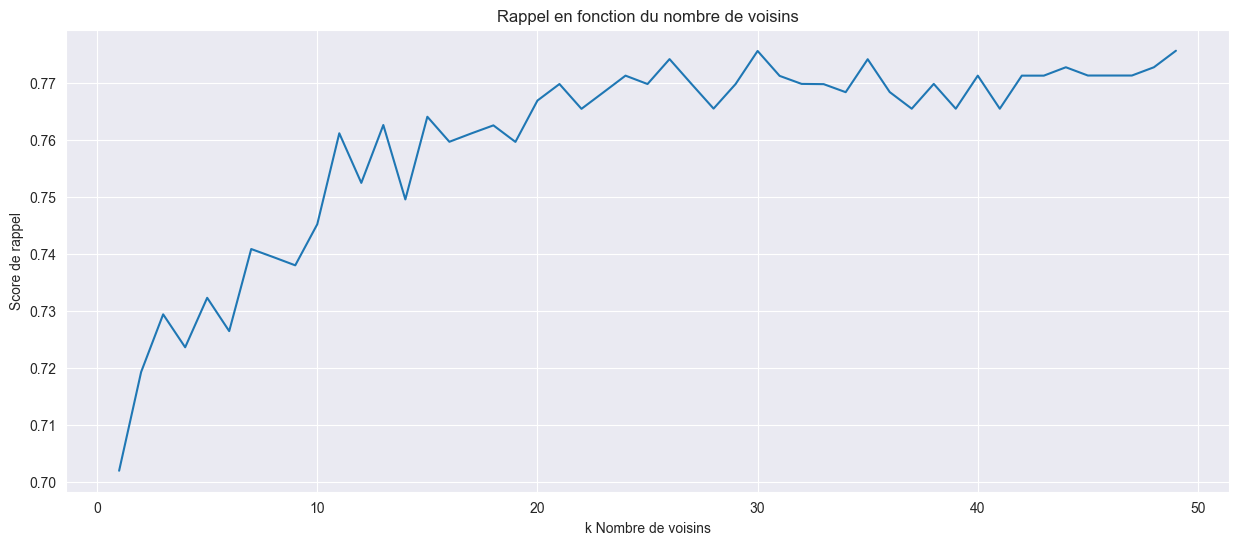

In [199]:
scores = []
for k in k_to_test:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(cross_val_score(knn, X_train, y_train, cv=10, scoring="recall_micro").mean())

plt.figure(figsize=(15, 6))
sns.lineplot(x=k_to_test, y=scores)
plt.xlabel("k Nombre de voisins")
plt.ylabel("Score de rappel")
plt.title("Rappel en fonction du nombre de voisins")
plt.show()

 le paramètre 'recall_micro' calcule le score de rappel global en prenant en compte toutes les prédictions et les étiquettes de sortie, sans distinction de classe. Il est utile lorsque le jeu de données est fortement déséquilibré, car il ne favorise pas les classes majoritaires.

In [200]:
best_k = np.argmax(scores) + 1
best_k

49

##### train

In [201]:
knn = KNeighborsClassifier(n_neighbors=best_k)
cross_val_score(knn, X, y, cv=10, scoring="accuracy").mean()

0.7643711551606288

In [202]:
def evaluate_classification_model(model, X_train, y_train, X_test, y_test, cv=10, verbose=1):
    """
    Évalue un modèle de classification en utilisant la validation croisée.
    
    Arguments:
    - model : le modèle de classification à évaluer
    - X : les données d'entrée
    - y : les étiquettes de sortie
    
    Retour:
    Un dictionnaire contenant les scores de précision, de rappel et d'exactitude moyens 
    calculés à partir de la validation croisée.
    """

    """
    Le choix entre 'recall_macro' et 'recall_micro' dépend de la nature du problème de classification 
    et des objectifs de l'analyse. En général, 'recall_macro' est préférable si toutes les classes sont considérées également importantes, 
    tandis que 'recall_micro' est plus approprié si la classe minoritaire est la plus intéressante 
    à identifier et à prédire correctement.
    """
    support_0 = len(y[y == 0])
    support_1 = len(y[y == 1])
    support = {'support_0': support_0, 'support_1': support_1}

    scoring_list = ['accuracy', 'precision_micro', "precision_macro", 'recall_micro', 'recall_macro', "f1", "roc_auc"]
    scoring = {**{e: e for e in scoring_list},
               'recall_0': make_scorer(recall_score, pos_label=0), 'recall_1': make_scorer(recall_score, pos_label=1),
               'precision_0': make_scorer(precision_score, pos_label=0),
               'precision_1': make_scorer(precision_score, pos_label=1)
               }

    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, return_train_score=False)

    cv_results_mean = dict(
        sorted({score_key: scores.get(f"test_{score_key}").mean() for score_key in scoring.keys()}.items()))
    cv_results_std = dict(
        sorted({score_key: scores.get(f"test_{score_key}").std() for score_key in scoring.keys()}.items()))

    if verbose:
        focus_scores = ['accuracy', 'precision_0', 'precision_1', 'recall_0', 'recall_1']
        others_focus_scores = [s for s in list(cv_results_mean.keys()) if s not in focus_scores]
        print(" Scores moyens de validation croisée :")
        print("-" * 34)
        for score_key in focus_scores:
            print(f"| {score_key:>15} : {cv_results_mean[score_key]:.2f} +- {cv_results_std[score_key]:.2f}", end=" ")
            if score_key == "precision_0":
                print(
                    f": Of all the people that the model predicted had no diabetes, only {cv_results_mean[score_key]:.0%} actually didn't have it.")
            elif score_key == "precision_1":
                print(
                    f": Of all the people that the model predicted had diabetes, only {cv_results_mean[score_key]:.0%} actually had it.")
            elif score_key == "recall_0":
                print(
                    f": Of all the people with no diabetes, the model predicted this outcome correctly for {cv_results_mean[score_key]:.0%} of them.")
            elif score_key == "recall_1":
                print(
                    f": Of all the people with diabetes, the model predicted this outcome correctly for {cv_results_mean[score_key]:.0%} of them.")
            elif score_key == "f1" and cv_results_mean[score_key] < 0.3:
                print(
                    f": Since this value is close to 0, this tells us that the model does a poor job of predicting whether individuals have diabetes")
            else:
                print("|")
        print("-" * 34)
        for score_key in others_focus_scores:
            print(f"| {score_key:>15} : {cv_results_mean[score_key]:.2f} +- {cv_results_std[score_key]:.2f} | ")
        print("-" * 34)

    # change key, start with 'cv'
    cv_results_mean = {f"cv_{k}": v for k, v in cv_results_mean.items()}

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report_test = classification_report(y_test, y_pred)
    dict_report = classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(dict_report).transpose()
    test_accuracy = df_classification_report["f1-score"]["accuracy"]
    test_support_0 = int(df_classification_report["support"][0])
    test_support_1 = int(df_classification_report["support"][1])
    test_precision_0 = df_classification_report["precision"][0]
    test_precision_1 = df_classification_report["precision"][1]
    test_recall_0 = df_classification_report["recall"][0]
    test_recall_1 = df_classification_report["recall"][1]
    test_f1_score_0 = df_classification_report["f1-score"][0]
    test_f1_score_1 = df_classification_report["f1-score"][1]

    test_results = {
        "test_accuracy": test_accuracy,
        "test_support_0": test_support_0,
        "test_support_1": test_support_1,
        "test_precision_0": test_precision_0,
        "test_precision_1": test_precision_1,
        "test_recall_0": test_recall_0,
        "test_recall_1": test_recall_1,
        "test_f1_score_0": test_f1_score_0,
        "test_f1_score_1": test_f1_score_1,
        "test_support_0": test_support_0,
        "test_support_1": test_support_1,
    }

    if verbose:
        print(" Rapport de classification sur le jeu de test :")
        print("-" * 34)
        print(f"|        accuracy : {test_accuracy:.2f} |")
        print(
            f"|     precision_0 : {test_precision_0:.2f} : Of all the people that the model predicted had no diabetes, only {test_precision_0:.0%} actually didn't have it.")
        print(
            f"|     precision_1 : {test_precision_1:.2f} : Of all the people that the model predicted had diabetes, only {test_precision_1:.0%} actually had it.")
        print(
            f"|        recall_0 : {test_recall_0:.2f} : Of all the people with no diabetes, the model predicted this outcome correctly for {test_recall_0:.0%} of them.")
        print(
            f"|        recall_1 : {test_recall_1:.2f} : Of all the people with diabetes, the model predicted this outcome correctly for {test_recall_1:.0%} of them.")
        if test_f1_score_0 < 0.3:
            print(
                f"|        f1_score : {test_f1_score_1:.2f} : Since this value is close to 0, this tells us that the model does a poor job of predicting whether individuals have diabetes")
        else:
            print(f"|        f1_score : {test_f1_score_1:.2f} |")
        #print("---")

        #print(report_test)
        print("-" * 34)

    return cv_results_mean, cv_results_std, test_results, model


cv_results_mean, _, test_results, knn = evaluate_classification_model(knn, X_train, y_train, X_test, y_test,
                                                                      verbose=True)
models_metrics_results.append({"model_name": "KNN", "model": knn, **cv_results_mean, **test_results})

 Scores moyens de validation croisée :
----------------------------------
|        accuracy : 0.76 +- 0.04 |
|     precision_0 : 0.78 +- 0.03 : Of all the people that the model predicted had no diabetes, only 78% actually didn't have it.
|     precision_1 : 0.73 +- 0.10 : Of all the people that the model predicted had diabetes, only 73% actually had it.
|        recall_0 : 0.89 +- 0.05 : Of all the people with no diabetes, the model predicted this outcome correctly for 89% of them.
|        recall_1 : 0.54 +- 0.07 : Of all the people with diabetes, the model predicted this outcome correctly for 54% of them.
----------------------------------
|              f1 : 0.61 +- 0.06 | 
| precision_macro : 0.75 +- 0.06 | 
| precision_micro : 0.76 +- 0.04 | 
|    recall_macro : 0.71 +- 0.04 | 
|    recall_micro : 0.76 +- 0.04 | 
|         roc_auc : 0.83 +- 0.04 | 
----------------------------------
 Rapport de classification sur le jeu de test :
----------------------------------
|        accurac

##### train with augmented dataset

In [203]:
cv_results_mean, _, test_results, knn = evaluate_classification_model(knn, X_train_augmented, y_train_augmented, X_test,
                                                                      y_test)
models_metrics_results.append(
    {"model_name": "KNN (Trained with Augmented Dataset)", "model": knn, **cv_results_mean, **test_results})

 Scores moyens de validation croisée :
----------------------------------
|        accuracy : 0.76 +- 0.04 |
|     precision_0 : 0.78 +- 0.03 : Of all the people that the model predicted had no diabetes, only 78% actually didn't have it.
|     precision_1 : 0.73 +- 0.10 : Of all the people that the model predicted had diabetes, only 73% actually had it.
|        recall_0 : 0.89 +- 0.05 : Of all the people with no diabetes, the model predicted this outcome correctly for 89% of them.
|        recall_1 : 0.54 +- 0.07 : Of all the people with diabetes, the model predicted this outcome correctly for 54% of them.
----------------------------------
|              f1 : 0.61 +- 0.06 | 
| precision_macro : 0.75 +- 0.06 | 
| precision_micro : 0.76 +- 0.04 | 
|    recall_macro : 0.71 +- 0.04 | 
|    recall_micro : 0.76 +- 0.04 | 
|         roc_auc : 0.83 +- 0.04 | 
----------------------------------
 Rapport de classification sur le jeu de test :
----------------------------------
|        accurac

#### 🤖 Logistic Regression

In [204]:
lr = LogisticRegression()

##### train

In [233]:
cv_results_mean, _, test_results, lr = evaluate_classification_model(lr, X_train, y_train, X_test, y_test)
models_metrics_results.append({"model_name": "Logistic Regression", "model": lr, **cv_results_mean, **test_results})

 Scores moyens de validation croisée :
----------------------------------
|        accuracy : 0.77 +- 0.04 |
|     precision_0 : 0.78 +- 0.03 : Of all the people that the model predicted had no diabetes, only 78% actually didn't have it.
|     precision_1 : 0.75 +- 0.10 : Of all the people that the model predicted had diabetes, only 75% actually had it.
|        recall_0 : 0.90 +- 0.05 : Of all the people with no diabetes, the model predicted this outcome correctly for 90% of them.
|        recall_1 : 0.52 +- 0.07 : Of all the people with diabetes, the model predicted this outcome correctly for 52% of them.
----------------------------------
|              f1 : 0.61 +- 0.07 | 
| precision_macro : 0.76 +- 0.06 | 
| precision_micro : 0.77 +- 0.04 | 
|    recall_macro : 0.71 +- 0.04 | 
|    recall_micro : 0.77 +- 0.04 | 
|         roc_auc : 0.83 +- 0.04 | 
----------------------------------
 Rapport de classification sur le jeu de test :
----------------------------------
|        accurac

##### train with augmented dataset

In [234]:
cv_results_mean, _, test_results, lr = evaluate_classification_model(lr, X_train_augmented, y_train_augmented, X_test,
                                                                     y_test)
models_metrics_results.append(
    {"model_name": "Logistic Regression (Trained with Augmented Dataset)", "model": lr, **cv_results_mean,
     **test_results})

 Scores moyens de validation croisée :
----------------------------------
|        accuracy : 0.77 +- 0.04 |
|     precision_0 : 0.78 +- 0.03 : Of all the people that the model predicted had no diabetes, only 78% actually didn't have it.
|     precision_1 : 0.75 +- 0.10 : Of all the people that the model predicted had diabetes, only 75% actually had it.
|        recall_0 : 0.90 +- 0.05 : Of all the people with no diabetes, the model predicted this outcome correctly for 90% of them.
|        recall_1 : 0.52 +- 0.07 : Of all the people with diabetes, the model predicted this outcome correctly for 52% of them.
----------------------------------
|              f1 : 0.61 +- 0.07 | 
| precision_macro : 0.76 +- 0.06 | 
| precision_micro : 0.77 +- 0.04 | 
|    recall_macro : 0.71 +- 0.04 | 
|    recall_micro : 0.77 +- 0.04 | 
|         roc_auc : 0.83 +- 0.04 | 
----------------------------------
 Rapport de classification sur le jeu de test :
----------------------------------
|        accurac

#### 🤖 Random Forest

In [207]:
rf = RandomForestClassifier()
cv_results_mean, _, test_results, rf = evaluate_classification_model(rf, X_train, y_train, X_test, y_test)

 Scores moyens de validation croisée :
----------------------------------
|        accuracy : 0.76 +- 0.05 |
|     precision_0 : 0.80 +- 0.04 : Of all the people that the model predicted had no diabetes, only 80% actually didn't have it.
|     precision_1 : 0.69 +- 0.10 : Of all the people that the model predicted had diabetes, only 69% actually had it.
|        recall_0 : 0.84 +- 0.07 : Of all the people with no diabetes, the model predicted this outcome correctly for 84% of them.
|        recall_1 : 0.61 +- 0.10 : Of all the people with diabetes, the model predicted this outcome correctly for 61% of them.
----------------------------------
|              f1 : 0.64 +- 0.08 | 
| precision_macro : 0.75 +- 0.06 | 
| precision_micro : 0.76 +- 0.05 | 
|    recall_macro : 0.73 +- 0.05 | 
|    recall_micro : 0.76 +- 0.05 | 
|         roc_auc : 0.83 +- 0.05 | 
----------------------------------
 Rapport de classification sur le jeu de test :
----------------------------------
|        accurac

##### hyperparams tuning...

In [208]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Voici une brève description des paramètres renvoyés par `rf.get_params()` dans un modèle `RandomForest` de `scikit-learn`:

- `bootstrap`: Indique si les arbres de la forêt aléatoire doivent être construits en utilisant la méthode bootstrap pour sélectionner les échantillons d'entraînement.
- `ccp_alpha`: Coefficient de complexité de pénalité pour la réduction de complexité dans les arbres.
- `class_weight`: Pondération des classes pour gérer les déséquilibres de classe dans les données d'entraînement.
- `criterion`: Fonction de coût utilisée pour faire des splits sur les nœuds dans les arbres.
- `max_depth`: Profondeur maximale de chaque arbre dans la forêt.
- `max_features`: Nombre maximal de caractéristiques à considérer pour faire des splits sur les nœuds dans les arbres.
- `max_leaf_nodes`: Nombre maximal de feuilles dans chaque arbre.
- `min_impurity_decrease`: Quantité minimale par laquelle l'impureté doit être réduite pour effectuer un split sur un nœud.
- `min_impurity_split`: Seuil d'impureté pour effectuer un split sur un nœud.
- `min_samples_leaf`: Nombre minimum d'échantillons requis pour être considéré comme une feuille dans un arbre.
- `min_samples_split`: Nombre minimum d'échantillons requis pour effectuer un split sur un nœud.
- `min_weight_fraction_leaf`: Fraction minimale de la somme totale des poids d'un nœud pour être considérée comme une feuille.
- `n_estimators`: Nombre d'arbres dans la forêt aléatoire.
- `n_jobs`: Nombre de cœurs à utiliser pour entraîner les arbres.
- `oob_score`: Indique si la méthode "out-of-bag" doit être utilisée pour évaluer la performance du modèle.
- `random_state`: Graine aléatoire utilisée pour initialiser les générateurs de nombres aléatoires.
- `verbose`: Niveau de verbosité pour les messages de sortie.
- `warm_start`: Indique si le modèle doit être réinitialisé entre les appels à `fit`.


In [209]:
#hyperparameter tuning
params = {
    'max_depth': [3, 5, 10, 50],
    'max_features': [3, 5, 7],
    'min_samples_split': [5, 10, 30],
    'n_estimators': [100, 200, 500]
}

L'argument `scoring` dans `GridSearchCV` définit la métrique utilisée pour évaluer les modèles et sélectionner les meilleurs hyperparamètres. 

In [210]:
grid_search_rf = GridSearchCV(estimator=rf, param_grid=params, cv=5, scoring='recall_micro', n_jobs=-1, verbose=1).fit(
    X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [211]:
grid_search_rf.best_params_

{'max_depth': 5,
 'max_features': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [212]:
grid_search_rf.best_score_

0.7727244291523303

L'attribut `.best_score_` de l'objet GridSearchCV est la meilleure moyenne de la validation croisée pour le modèle avec les meilleurs hyperparamètres trouvés. Cette moyenne est basée sur le score choisi lors de la définition de GridSearchCV en utilisant l'argument `scoring`.

##### final model installation & train

In [213]:
# Construire un modèle RandomForest en utilisant les meilleurs hyperparamètres trouvés
best_rf = RandomForestClassifier(**grid_search_rf.best_params_)

cv_results_mean, _, test_results, best_rf = evaluate_classification_model(best_rf, X_train, y_train, X_test, y_test)
models_metrics_results.append({"model_name": "Random Forest", "model": best_rf, **cv_results_mean, **test_results})

 Scores moyens de validation croisée :
----------------------------------
|        accuracy : 0.75 +- 0.06 |
|     precision_0 : 0.78 +- 0.04 : Of all the people that the model predicted had no diabetes, only 78% actually didn't have it.
|     precision_1 : 0.68 +- 0.10 : Of all the people that the model predicted had diabetes, only 68% actually had it.
|        recall_0 : 0.86 +- 0.06 : Of all the people with no diabetes, the model predicted this outcome correctly for 86% of them.
|        recall_1 : 0.54 +- 0.10 : Of all the people with diabetes, the model predicted this outcome correctly for 54% of them.
----------------------------------
|              f1 : 0.60 +- 0.10 | 
| precision_macro : 0.73 +- 0.07 | 
| precision_micro : 0.75 +- 0.06 | 
|    recall_macro : 0.70 +- 0.06 | 
|    recall_micro : 0.75 +- 0.06 | 
|         roc_auc : 0.83 +- 0.05 | 
----------------------------------
 Rapport de classification sur le jeu de test :
----------------------------------
|        accurac

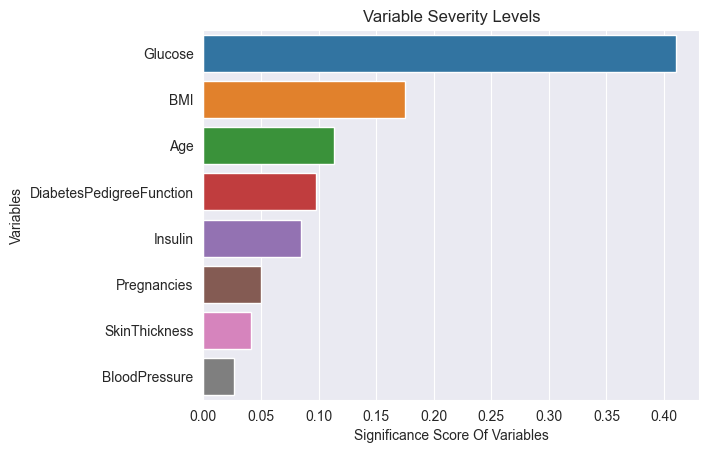

In [214]:
feature_imp = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

##### ... train with augmented dataset

In [215]:
cv_results_mean, _, test_results, best_rf = evaluate_classification_model(best_rf, X_train_augmented, y_train_augmented,
                                                                          X_test, y_test)
models_metrics_results.append(
    {"model_name": "Random Forest (Trained with Augmented Dataset)", "model": best_rf, **cv_results_mean,
     **test_results})

 Scores moyens de validation croisée :
----------------------------------
|        accuracy : 0.76 +- 0.05 |
|     precision_0 : 0.79 +- 0.04 : Of all the people that the model predicted had no diabetes, only 79% actually didn't have it.
|     precision_1 : 0.70 +- 0.10 : Of all the people that the model predicted had diabetes, only 70% actually had it.
|        recall_0 : 0.87 +- 0.06 : Of all the people with no diabetes, the model predicted this outcome correctly for 87% of them.
|        recall_1 : 0.56 +- 0.10 : Of all the people with diabetes, the model predicted this outcome correctly for 56% of them.
----------------------------------
|              f1 : 0.61 +- 0.09 | 
| precision_macro : 0.74 +- 0.06 | 
| precision_micro : 0.76 +- 0.05 | 
|    recall_macro : 0.71 +- 0.06 | 
|    recall_micro : 0.76 +- 0.05 | 
|         roc_auc : 0.84 +- 0.05 | 
----------------------------------
 Rapport de classification sur le jeu de test :
----------------------------------
|        accurac

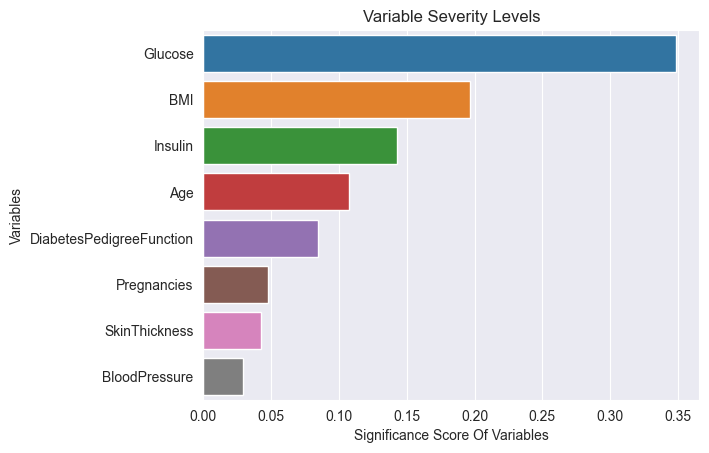

In [216]:
feature_imp = pd.Series(best_rf.feature_importances_, index=X_train_augmented.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

#### 🤖 AdaBoost

In [217]:
ad = AdaBoostClassifier()
cv_results_mean, cv_results_std, test_results, ad = evaluate_classification_model(ad, X_train, y_train, X_test, y_test)

 Scores moyens de validation croisée :
----------------------------------
|        accuracy : 0.76 +- 0.05 |
|     precision_0 : 0.79 +- 0.04 : Of all the people that the model predicted had no diabetes, only 79% actually didn't have it.
|     precision_1 : 0.68 +- 0.10 : Of all the people that the model predicted had diabetes, only 68% actually had it.
|        recall_0 : 0.85 +- 0.06 : Of all the people with no diabetes, the model predicted this outcome correctly for 85% of them.
|        recall_1 : 0.59 +- 0.09 : Of all the people with diabetes, the model predicted this outcome correctly for 59% of them.
----------------------------------
|              f1 : 0.63 +- 0.08 | 
| precision_macro : 0.74 +- 0.07 | 
| precision_micro : 0.76 +- 0.05 | 
|    recall_macro : 0.72 +- 0.06 | 
|    recall_micro : 0.76 +- 0.05 | 
|         roc_auc : 0.81 +- 0.03 | 
----------------------------------
 Rapport de classification sur le jeu de test :
----------------------------------
|        accurac

##### hyperparams tuning...

In [218]:
ad.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

Voici une brève description des paramètres renvoyés par `ad.get_params()` dans un modèle `AdaBoost` de `scikit-learn`:

- `algorithm`: Algorithme utilisé pour construire les classificateurs successifs, peut être "SAMME" ou "SAMME.R".
- `base_estimator`: Classificateur de base utilisé pour construire les classificateurs successifs.
- `learning_rate`: Taux d'apprentissage pour adapter les pondérations des classificateurs successifs.
- `n_estimators`: Nombre de classificateurs successifs utilisés pour construire le modèle final.
- `random_state`: Graine aléatoire utilisée pour initialiser les générateurs de nombres aléatoires.


In [219]:
#hyperparameter tuning
params = {
    "learning_rate": [0.2, 0.1, 0.5, 0.8, 1.0],
    "n_estimators": [25, 50, 100, 150, 200]
}

In [220]:
grid_search_ad = GridSearchCV(estimator=ad, param_grid=params, cv=5, scoring='recall', n_jobs=-1, verbose=True).fit(
    X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [221]:
grid_search_ad.best_score_

0.6093971631205675

In [222]:
grid_search_ad.best_params_

{'learning_rate': 1.0, 'n_estimators': 50}

##### final model installation & train

In [223]:
# Construire un modèle RandomForest en utilisant les meilleurs hyperparamètres trouvés
best_ad = AdaBoostClassifier(**grid_search_ad.best_params_)

cv_results_mean, _, test_results, best_ad = evaluate_classification_model(best_ad, X_train, y_train, X_test, y_test)
models_metrics_results.append({"model_name": "AdaBoost", "model": best_ad, **cv_results_mean, **test_results})

 Scores moyens de validation croisée :
----------------------------------
|        accuracy : 0.76 +- 0.05 |
|     precision_0 : 0.79 +- 0.04 : Of all the people that the model predicted had no diabetes, only 79% actually didn't have it.
|     precision_1 : 0.68 +- 0.10 : Of all the people that the model predicted had diabetes, only 68% actually had it.
|        recall_0 : 0.85 +- 0.06 : Of all the people with no diabetes, the model predicted this outcome correctly for 85% of them.
|        recall_1 : 0.59 +- 0.09 : Of all the people with diabetes, the model predicted this outcome correctly for 59% of them.
----------------------------------
|              f1 : 0.63 +- 0.08 | 
| precision_macro : 0.74 +- 0.07 | 
| precision_micro : 0.76 +- 0.05 | 
|    recall_macro : 0.72 +- 0.06 | 
|    recall_micro : 0.76 +- 0.05 | 
|         roc_auc : 0.81 +- 0.03 | 
----------------------------------
 Rapport de classification sur le jeu de test :
----------------------------------
|        accurac

##### train with augmented dataset

In [224]:
cv_results_mean, _, test_results, best_ad = evaluate_classification_model(best_ad, X_train_augmented, y_train_augmented,
                                                                          X_test, y_test)
models_metrics_results.append(
    {"model_name": "AdaBoost (Trained with Augmented Dataset)", "model": best_ad, **cv_results_mean, **test_results})

 Scores moyens de validation croisée :
----------------------------------
|        accuracy : 0.76 +- 0.05 |
|     precision_0 : 0.79 +- 0.04 : Of all the people that the model predicted had no diabetes, only 79% actually didn't have it.
|     precision_1 : 0.68 +- 0.10 : Of all the people that the model predicted had diabetes, only 68% actually had it.
|        recall_0 : 0.85 +- 0.06 : Of all the people with no diabetes, the model predicted this outcome correctly for 85% of them.
|        recall_1 : 0.59 +- 0.09 : Of all the people with diabetes, the model predicted this outcome correctly for 59% of them.
----------------------------------
|              f1 : 0.63 +- 0.08 | 
| precision_macro : 0.74 +- 0.07 | 
| precision_micro : 0.76 +- 0.05 | 
|    recall_macro : 0.72 +- 0.06 | 
|    recall_micro : 0.76 +- 0.05 | 
|         roc_auc : 0.81 +- 0.03 | 
----------------------------------
 Rapport de classification sur le jeu de test :
----------------------------------
|        accurac

#### 🤖 XGBoost

In [225]:
xgb = GradientBoostingClassifier()
xgb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

##### hyperparams tuning...

In [226]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 5),
    "max_depth": [3, 5, 8],
    "subsample": [0.5, 0.9, 1.0],
    "n_estimators": [100, 1000]
}
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=5, n_jobs=-1, verbose=1).fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


In [227]:
xgb_cv_model.best_params_

{'learning_rate': 0.2,
 'max_depth': 8,
 'min_samples_split': 0.4,
 'n_estimators': 100,
 'subsample': 0.5}

##### final model installation & train

In [228]:
best_xgb = GradientBoostingClassifier(**xgb_cv_model.best_params_)

cv_results_mean, _, test_results, best_xgb = evaluate_classification_model(best_xgb, X_train, y_train, X_test, y_test)
models_metrics_results.append({"model_name": "XGBoost", "model": best_xgb, **cv_results_mean, **test_results})

 Scores moyens de validation croisée :
----------------------------------
|        accuracy : 0.77 +- 0.04 |
|     precision_0 : 0.80 +- 0.03 : Of all the people that the model predicted had no diabetes, only 80% actually didn't have it.
|     precision_1 : 0.70 +- 0.08 : Of all the people that the model predicted had diabetes, only 70% actually had it.
|        recall_0 : 0.86 +- 0.05 : Of all the people with no diabetes, the model predicted this outcome correctly for 86% of them.
|        recall_1 : 0.59 +- 0.08 : Of all the people with diabetes, the model predicted this outcome correctly for 59% of them.
----------------------------------
|              f1 : 0.64 +- 0.07 | 
| precision_macro : 0.75 +- 0.05 | 
| precision_micro : 0.77 +- 0.04 | 
|    recall_macro : 0.73 +- 0.05 | 
|    recall_micro : 0.77 +- 0.04 | 
|         roc_auc : 0.83 +- 0.04 | 
----------------------------------
 Rapport de classification sur le jeu de test :
----------------------------------
|        accurac

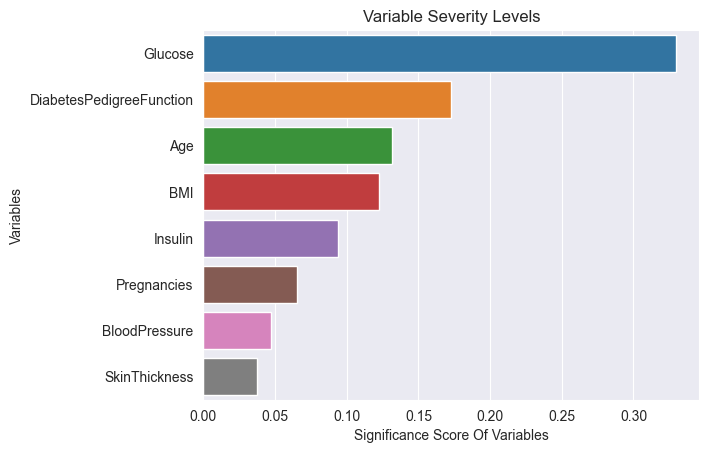

In [229]:
feature_imp = pd.Series(best_xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

##### train with augmented dataset

In [230]:
cv_results_mean, _, test_results, best_xgb = evaluate_classification_model(best_xgb, X_train_augmented,
                                                                           y_train_augmented, X_test, y_test)
models_metrics_results.append(
    {"model_name": "XGBoost (Trained with Augmented Dataset)", "model": best_xgb, **cv_results_mean, **test_results})

 Scores moyens de validation croisée :
----------------------------------
|        accuracy : 0.76 +- 0.05 |
|     precision_0 : 0.79 +- 0.03 : Of all the people that the model predicted had no diabetes, only 79% actually didn't have it.
|     precision_1 : 0.69 +- 0.10 : Of all the people that the model predicted had diabetes, only 69% actually had it.
|        recall_0 : 0.85 +- 0.07 : Of all the people with no diabetes, the model predicted this outcome correctly for 85% of them.
|        recall_1 : 0.58 +- 0.07 : Of all the people with diabetes, the model predicted this outcome correctly for 58% of them.
----------------------------------
|              f1 : 0.63 +- 0.07 | 
| precision_macro : 0.74 +- 0.06 | 
| precision_micro : 0.76 +- 0.05 | 
|    recall_macro : 0.72 +- 0.05 | 
|    recall_micro : 0.76 +- 0.05 | 
|         roc_auc : 0.82 +- 0.05 | 
----------------------------------
 Rapport de classification sur le jeu de test :
----------------------------------
|        accurac

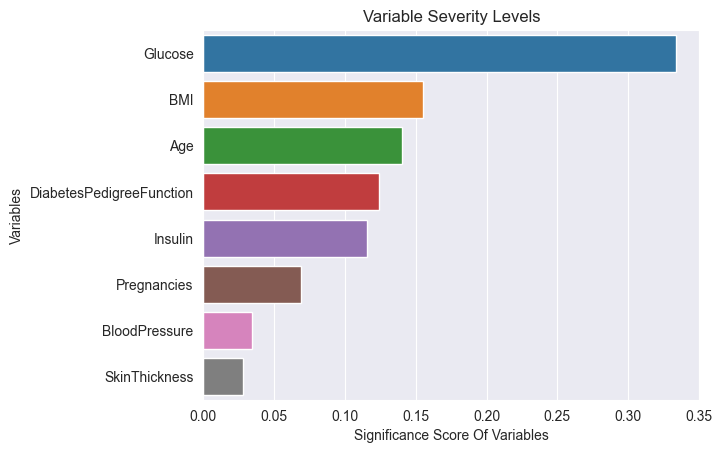

In [231]:
feature_imp = pd.Series(best_xgb.feature_importances_, index=X_train_augmented.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()


### Compare models

In [340]:
df_metrics_results = pd.DataFrame(models_metrics_results)
# drop nan values in test_accuracy column and model_name column
df_metrics_results.dropna(subset=['test_accuracy', 'model_name'], inplace=True)
df_metrics_results.drop_duplicates(subset=['model_name'], keep='last', inplace=True)
df_metrics_results.sort_values(by="test_accuracy", inplace=True, ascending=False)  # sort by test accuracy
df_metrics_results.set_index("model_name", inplace=True)
df_metrics_results

,model,accuracy,f1,precision_0,precision_1,precision_macro,precision_micro,recall_0,recall_1,recall_macro,...,test_support_0,test_support_1,test_precision_0,test_precision_1,test_recall_0,test_recall_1,test_f1_score_0,test_f1_score_1,test_suppport_0,test_suppport_1
model_name,,,,,,,,,,,,,,,,,,,,,
Random Forest (Trained with Augmented Dataset),"(DecisionTreeClassifier(max_depth=5, max_featu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.00,30.00,0.87,0.75,0.83,0.80,0.85,0.77,47.00,30.00
KNN (Trained with Augmented Dataset),KNeighborsClassifier(n_neighbors=49),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.00,30.00,0.86,0.69,0.77,0.80,0.81,0.74,47.00,30.00
Logistic Regression (Trained with Augmented Dataset),LogisticRegression(),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.00,30.00,0.83,0.71,0.81,0.73,0.82,0.72,47.00,30.00
XGBoost,([DecisionTreeRegressor(criterion='friedman_ms...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.00,30.00,0.77,0.75,0.87,0.60,0.82,0.67,47.00,30.00
Random Forest,"(DecisionTreeClassifier(max_depth=5, max_featu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.00,30.00,0.75,0.76,0.89,0.53,0.82,0.63,47.00,30.00
Logistic Regression,LogisticRegression(),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.00,30.00,0.74,0.79,0.91,0.50,0.82,0.61,47.00,30.00
KNN,KNeighborsClassifier(n_neighbors=49),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.00,30.00,0.74,0.75,0.89,0.50,0.81,0.60,47.00,30.00
AdaBoost (Trained with Augmented Dataset),"(DecisionTreeClassifier(max_depth=1, random_st...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.00,30.00,0.76,0.69,0.83,0.60,0.80,0.64,47.00,30.00
XGBoost (Trained with Augmented Dataset),([DecisionTreeRegressor(criterion='friedman_ms...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.00,30.00,0.76,0.67,0.81,0.60,0.78,0.63,47.00,30.00


In [245]:
df_metrics_results.columns

Index(['model', 'accuracy', 'f1', 'precision_0', 'precision_1',
       'precision_macro', 'precision_micro', 'recall_0', 'recall_1',
       'recall_macro', 'recall_micro', 'roc_auc', 'cv_accuracy', 'cv_f1',
       'cv_precision_0', 'cv_precision_1', 'cv_precision_macro',
       'cv_precision_micro', 'cv_recall_0', 'cv_recall_1', 'cv_recall_macro',
       'cv_recall_micro', 'cv_roc_auc', 'test_accuracy', 'test_support_0',
       'test_support_1', 'test_precision_0', 'test_precision_1',
       'test_recall_0', 'test_recall_1', 'test_f1_score_0', 'test_f1_score_1',
       'test_suppport_0', 'test_suppport_1'],
      dtype='object')

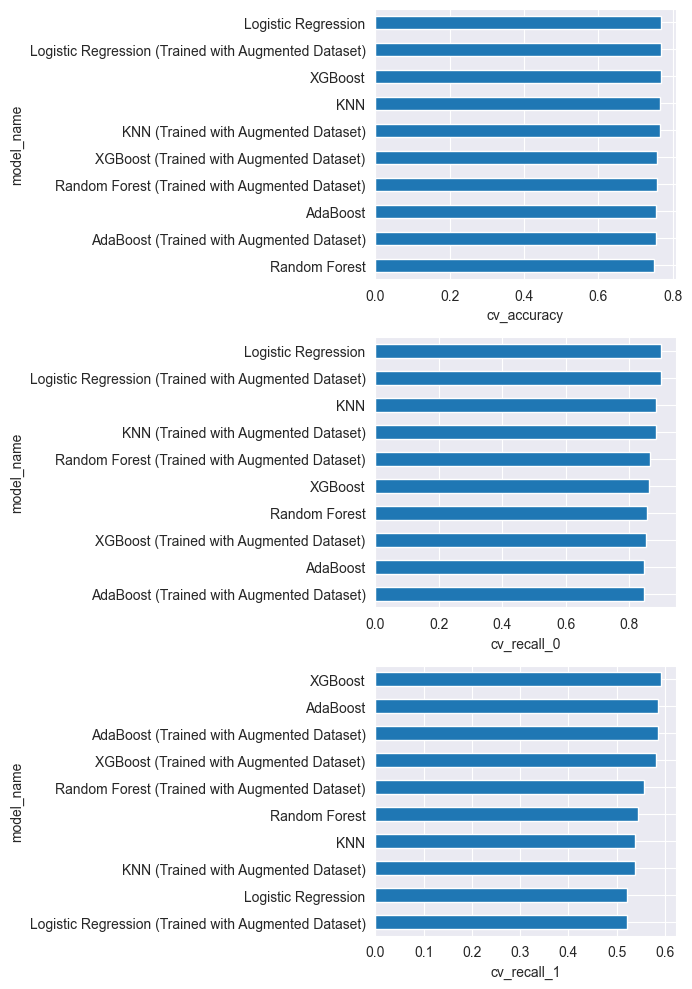

In [257]:
fig = plt.figure(figsize=(7, 10))
watched_metrics = ["cv_accuracy", "cv_recall_0", "cv_recall_1"]
for i, metric_col in enumerate(watched_metrics, start=1):
    ax = fig.add_subplot(3, 1, i)
    df_metrics_results[metric_col].sort_values().plot.barh(ax=ax)
    ax.set_xlabel(metric_col)

plt.tight_layout()
plt.show()

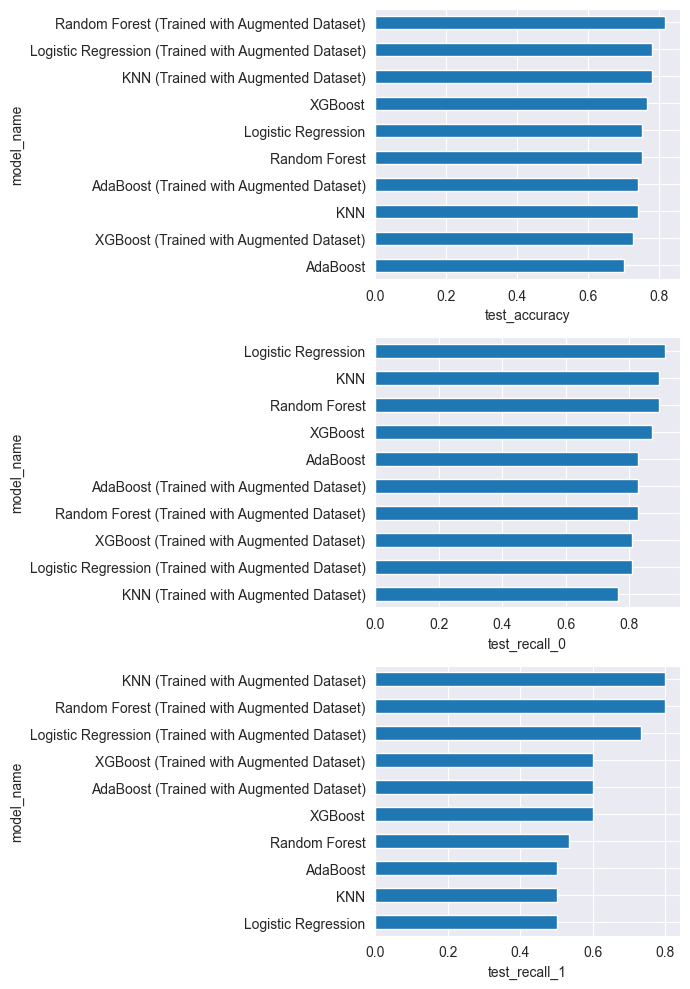

In [258]:
fig = plt.figure(figsize=(7, 10))
watched_metrics = ["test_accuracy", "test_recall_0", "test_recall_1"]
for i, metric_col in enumerate(watched_metrics, start=1):
    ax = fig.add_subplot(3, 1, i)
    df_metrics_results[metric_col].sort_values().plot.barh(ax=ax)
    ax.set_xlabel(metric_col)

plt.tight_layout()
plt.show()

In [261]:
COLORS_MODELS = {"KNN": "#11A579", "Random Forest": "#1152A6", "AdaBoost": "#9CA611", "XGBoost": "#A64311",
                 "Logistic Regression": "#6F11A6"}
model_colors = [COLORS_MODELS[model_name.split("(")[0].strip()] for model_name in df_metrics_results.index.tolist()]
model_colors

['#1152A6',
 '#11A579',
 '#6F11A6',
 '#A64311',
 '#1152A6',
 '#6F11A6',
 '#11A579',
 '#9CA611',
 '#A64311',
 '#9CA611']

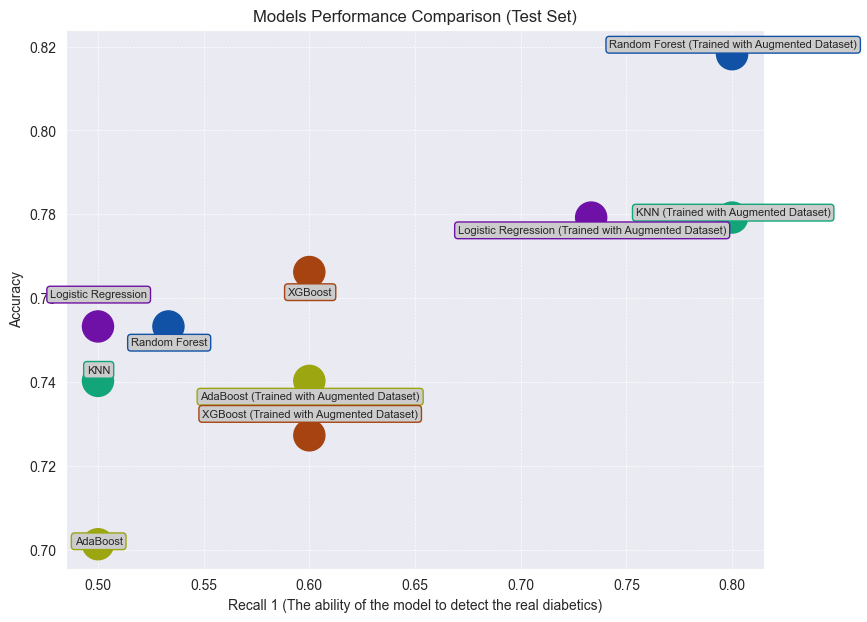

In [349]:
def compare_models_performance(df, model_colors,x,y,xlabel, ylabel,title,u = 0.0075):
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.scatter(df[x], df[y], s=500, c=model_colors)
    ax.set_title(title)

    # Ajouter le texte de chaque point
    for i, txt in enumerate(df.index):
        # generate x,y random couple [0 to 0.01]

        x_rand = np.random.uniform(-u, u)
        y_rand = np.random.uniform(-u, u)

        ax.annotate(txt, xy=(df[x][i], df[y][i] + y_rand), fontsize=8,
                    ha='center',
                    textcoords='offset points',
                    bbox=dict(boxstyle="round", fc="0.8", color=model_colors[i]), arrowprops=dict(arrowstyle="->"))

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True, linestyle='--', linewidth=0.5)

    plt.show()

compare_models_performance(df_metrics_results, model_colors,x="test_recall_1",y="test_accuracy",
                           xlabel="Recall 1 (The ability of the model to detect the real diabetics)", ylabel="Accuracy",title="Models Performance Comparison (Test Set)")

Le F1 score est la moyenne harmonique de la précision et du rappel. Il est utilisé pour équilibrer la précision et le rappel et est souvent utilisé dans les cas où les classes positives et négatives sont déséquilibrées.

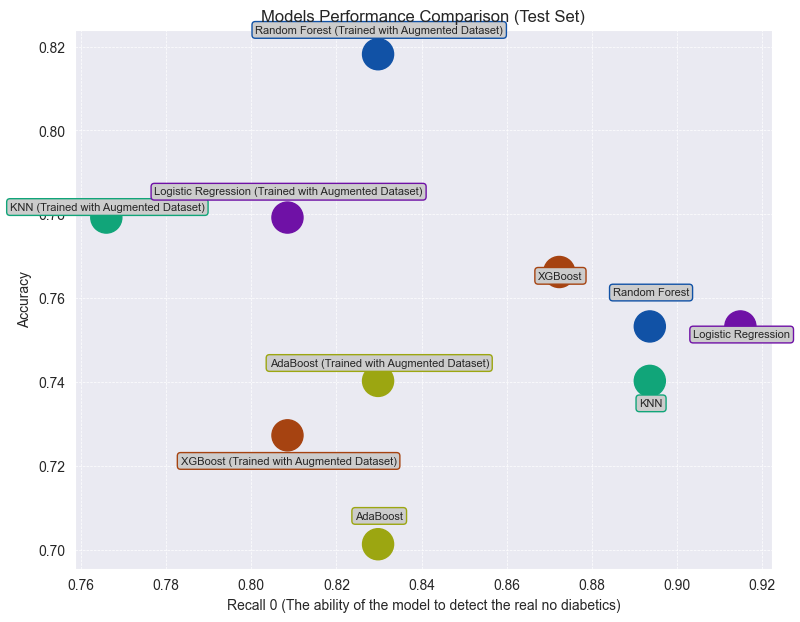

In [344]:
compare_models_performance(df_metrics_results, model_colors,x="test_recall_0",y="test_accuracy",
                           xlabel="Recall 0 (The ability of the model to detect the real no diabetics)", ylabel="Accuracy",title="Models Performance Comparison (Test Set)")

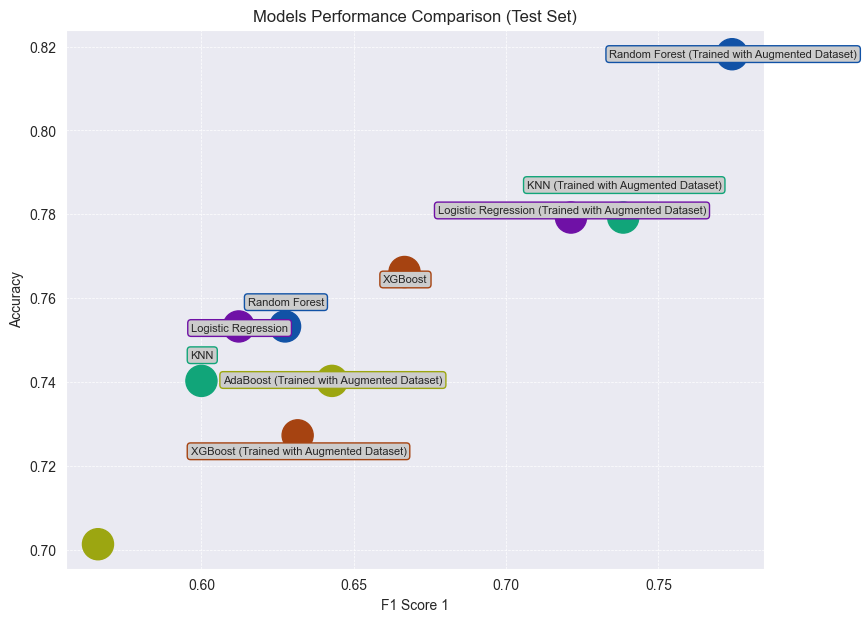

In [346]:
compare_models_performance(df_metrics_results, model_colors,x="test_f1_score_1",y="test_accuracy", xlabel="F1 Score 1", ylabel="Accuracy",title="Models Performance Comparison (Test Set)")

Note : The scores and models can be further improved using hyperparameter tuning with different parameters

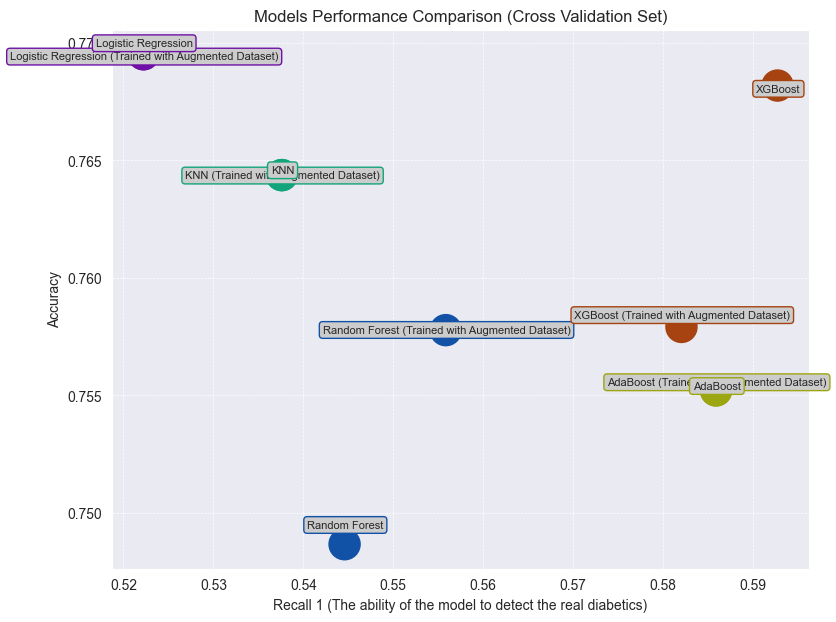

In [361]:
compare_models_performance(df_metrics_results, model_colors,x="cv_recall_1",y="cv_accuracy",
                           xlabel="Recall 1 (The ability of the model to detect the real diabetics)", ylabel="Accuracy",title="Models Performance Comparison (Cross Validation Set)", u=0.0007)

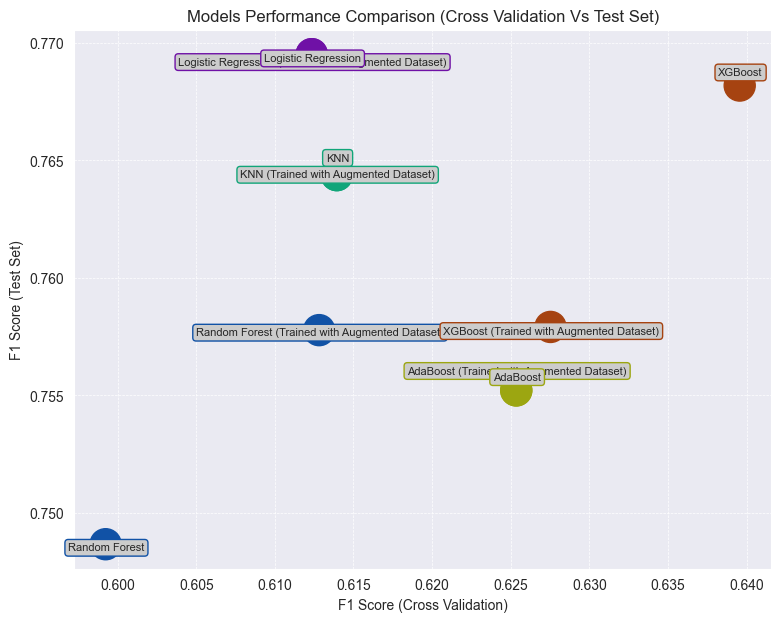

In [357]:
compare_models_performance(df_metrics_results, model_colors,x="cv_f1",y="cv_accuracy", xlabel="F1 Score (Cross Validation)", ylabel="F1 Score (Test Set)",title="Models Performance Comparison (Cross Validation Vs Test Set)", u=0.0007)

### eh

- Afficher les individus qui sont le plus difficile à predire
- Pour chaque models, quel sont les erreurs

### ML Model Selection : KNN 🥇

Parmi les 5 modèles, c'est le K-NN que j'ai sélectionné car

In [ ]:
knn

KNeighborsClassifier(n_neighbors=49)

il est possible d'obtenir une approximation de **l'importance des variables** en effectuant une analyse en série sur chaque variable.

L'idée est de **mesurer l'impact sur les prédictions** lorsque vous retirez une variable à la fois. **Si l'exclusion d'une variable entraîne une baisse significative** de la performance du modèle, cela suggère que **cette variable est importante** pour la prédiction.

In [362]:
def vars_importance_analysis(model, X,y, metric_focus="accuracy"):
    if metric_focus == "accuracy":
        score = accuracy_score
    elif metric_focus == "recall":
        score = recall_score
    elif metric_focus == "precision":
        score = precision_score
    else:
        score = accuracy_score
        metric_focus = "accuracy"


    init_accuracy = cross_val_score(model, X, y, cv=10, scoring=metric_focus).mean()

    # l'accuracy initiale
    print(f"CV {metric_focus.capitalize()} initiale : {init_accuracy:.2f} ")

    # mesure de l'accuracy après l'exclusion de chaque feature
    mesures = {}
    for feature in X.columns:
        X_temp = X.drop(feature, axis=1)
        accuracy_temp = cross_val_score(model, X_temp, y, cv=10, scoring=metric_focus).mean()
        mesures[feature] = accuracy_temp

    for feature, accuracy_temp in sorted(mesures.items(), key=lambda x: x[1]):
        p = (init_accuracy - accuracy_temp) / init_accuracy
        print(
            f"CV {metric_focus.capitalize()} après l'exclusion de la feature '{feature}' : {accuracy_temp:.2f} ({p :.1%})")


vars_importance_analysis(knn, X, y, metric_focus="accuracy")

CV Accuracy initiale : 0.76 
CV Accuracy après l'exclusion de la feature 'Glucose' : 0.70 (9.0%)
CV Accuracy après l'exclusion de la feature 'BMI' : 0.76 (1.0%)
CV Accuracy après l'exclusion de la feature 'Age' : 0.76 (0.3%)
CV Accuracy après l'exclusion de la feature 'Insulin' : 0.76 (0.2%)
CV Accuracy après l'exclusion de la feature 'BloodPressure' : 0.76 (0.0%)
CV Accuracy après l'exclusion de la feature 'DiabetesPedigreeFunction' : 0.76 (-0.0%)
CV Accuracy après l'exclusion de la feature 'SkinThickness' : 0.77 (-0.2%)
CV Accuracy après l'exclusion de la feature 'Pregnancies' : 0.77 (-1.2%)


Le glucose est la variable la plus importante
ce qui n'est pas illogique

In [363]:
vars_importance_analysis(knn, X, y, metric_focus="recall")

CV Recall initiale : 0.54 
CV Recall après l'exclusion de la feature 'Glucose' : 0.39 (27.1%)
CV Recall après l'exclusion de la feature 'Age' : 0.51 (5.0%)
CV Recall après l'exclusion de la feature 'BMI' : 0.53 (0.7%)
CV Recall après l'exclusion de la feature 'Insulin' : 0.54 (-0.0%)
CV Recall après l'exclusion de la feature 'SkinThickness' : 0.54 (-0.7%)
CV Recall après l'exclusion de la feature 'BloodPressure' : 0.55 (-2.8%)
CV Recall après l'exclusion de la feature 'DiabetesPedigreeFunction' : 0.56 (-3.5%)
CV Recall après l'exclusion de la feature 'Pregnancies' : 0.57 (-5.5%)


In [364]:
vars_importance_analysis(knn, X_train_augmented, y_train_augmented, metric_focus="recall")

CV Recall initiale : 0.78 
CV Recall après l'exclusion de la feature 'Glucose' : 0.75 (3.4%)
CV Recall après l'exclusion de la feature 'Insulin' : 0.77 (1.4%)
CV Recall après l'exclusion de la feature 'BMI' : 0.77 (0.6%)
CV Recall après l'exclusion de la feature 'Age' : 0.78 (0.2%)
CV Recall après l'exclusion de la feature 'SkinThickness' : 0.78 (0.0%)
CV Recall après l'exclusion de la feature 'BloodPressure' : 0.79 (-1.2%)
CV Recall après l'exclusion de la feature 'DiabetesPedigreeFunction' : 0.80 (-2.6%)
CV Recall après l'exclusion de la feature 'Pregnancies' : 0.80 (-2.8%)


### DL Models ! 

In [ ]:
# Créer le modèle
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiler le modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(X_test, y_test)

# Afficher l'exactitude sur l'ensemble de test
print('Test accuracy:', test_acc)

## Conclusion #Marketing

> Le modèle est très bon pour prédire les gens qui n'ont pas le diabète. J'imagine bien mon modèle être utiliser par les medecins car ils leurs permettra de gagner du temps en éliminant rapidement les gens qui n'ont pas de diabète pour sure.

# TODO

- XGBoost todo

- sur le training afficher la vrai valeur et la prédiction pour voir les biais, voir ce qu'il arrive à bien classifier, esayer de comprendre pk ça il arrive bien a class, donne des pitestes : faire fct qui affiche les indivu là où il se trompte

voir important c des variables dans la construction des modèle, ar importance, VIP p

pas importante, donc plutot que eliminer


atttetin oversamplit alors que missing values  0qiuel ets le model quia rriv à elimitner le plus e pa=tin

mette le sueli le plus vbas possible pour etre de  
bouger le seuil pour afficher plus de1 quoi

- Courbe ROC : La courbe ROC (Receiver Operating Characteristic) est une courbe qui représente la performance d'un modèle de classification binaire en fonction de différents seuils de classification. Elle est créée en traçant le taux de vrais positifs (TPR) en fonction du taux de faux positifs (FPR) pour chaque seuil de classification. La courbe ROC est souvent utilisée pour évaluer les performances d'un modèle de classification binaire et pour choisir le meilleur seuil de classification.

-  AUC : L'aire sous la courbe ROC (AUC) est une mesure de la performance globale d'un modèle de classification binaire. Elle est calculée en calculant l'aire sous la courbe ROC et représente la probabilité que le modèle classe un exemple positif aléatoire plus haut qu'un exemple négatif aléatoire. L'AUC est souvent utilisée pour comparer la performance de différents modèles de classification.
